In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
from random import randint

### The K-means algorithm is defined as follows:

In [25]:
# class K_means():
def initialize(X_data, centroids):
#     df = df.drop(labels='column_to_delete', axis=1)
    X_data = pd.DataFrame(X_data).transpose()       # X_data argument is expected to have dimension in rows and number of observation in coloumns
    centroids = pd.DataFrame(centroids).transpose() # centroids argument is expected to have dimension in rows
    N = X_data.shape[0]
    X_data = X_data.assign(cluster = np.zeros(N)) 
    return X_data, centroids
#         print(self.X_data)

# def assign_cluster(X_data, centroids):
#     X_data = X_data.copy() # to avoid mutability of dataframes
#     N = X_data.shape[0]
#     for i in range(N):
#         X_data.loc[i,'cluster'] = np.argmin((np.square(X_data.loc[i, :]-centroids)).sum(axis=1))
#     return X_data

def assign_cluster(X_data, centroids):
    X_data = X_data.copy() # to avoid mutability of dataframes
    N, M = X_data.shape    # N = num. of observations, M = dimension of data
    Nc, Mc = centroids.shape # Nc = num. of centroids, Mc = dimension of data
    for i in range(N):
        dum_var = np.zeros(Nc)
        for j in range(Nc):
            dum_var[j] = (np.linalg.norm(X_data.loc[i, [0,1]] - centroids.loc[j,:]))
        X_data.loc[i,'cluster'] = np.argmin(dum_var)
    
    
#     for i in range(N):
#         X_data.loc[i,'cluster'] = np.argmin((np.square(X_data.loc[i, :]-centroids)).sum(axis=1))
        
    return X_data

def update_centroids(X_data, centroids):
    centroids = centroids.copy() # to avoid mutability of dataframes
    for i in range(K):
        dum = X_data[X_data['cluster'] == i]
        dum = dum[dum.columns[0:X_data.shape[1]-1]]    
#         print(dum)
        if dum.shape[0] != 0:
            centroids.loc[i, :] = dum.sum(axis=0)/dum.shape[0]
        else:
            centroids.loc[i, :] = 0
#             print('i am in for k =', i)
#     print(centroids)
    return centroids

### Generate Data

In [26]:
def generate_data(k):
    ##### --------------------------------------------------------------- #####
    
    # Set three centers, the model should predict similar results
    center_1 = np.array([0,5])
    center_2 = np.array([-1,2])
    center_3 = np.array([1,1])
    center_4 = np.array([2,-2])
    center_5 = np.array([-10,-1])

    # Generate random data and center it to the three centers
    data_1 = np.random.randn(100, 2) + center_1
    data_2 = np.random.randn(100,2) + center_2
    data_3 = np.random.randn(100,2) + center_3
    data_4 = np.random.randn(100,2) + center_4
    data_5 = np.random.randn(100,2) + center_5

    data = np.concatenate((data_1, data_2, data_3, data_4, data_5), axis = 0)
    centers = np.array([center_1, center_2, center_3, center_4, center_5 ])
    
    plt.figure(figsize=(20, 10))
    plt.scatter(data[:,0], data[:,1], s=7)
    plt.scatter(centers[:,0], centers[:,1], marker='.', c='r', s=150)
    return data
    
    ##### --------------------------------------------------------------- #####
    
    ##### --------------------------------------------------------------- #####
    
#     c = 5
#     data, y = make_blobs(n_samples=200, centers=c, n_features=2,random_state=0)   
#     color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#              for i in range(K)]

#     plt.figure(figsize=(20, 10))
#     for i in range(5):
#         Aa = data[y == i]
#         plt.scatter(Aa[:,0], Aa[:,1], marker='.', c= color[i] , s=150)
#     return data, y

    ##### --------------------------------------------------------------- #####

          0         1
0 -1.965224  0.400787
1  0.772704  5.394087
2  0.000000  0.000000
3  0.000000  0.000000
4  0.000000  0.000000
iteration 0 , error = 37.890610026037265
          0         1
0 -6.678644  0.103158
1  0.138128  4.955937
2  1.327184 -0.331141
3  0.000000  0.000000
4  0.000000  0.000000
iteration 1 , error = 6.861820758952292
           0         1
0 -10.197507 -1.046977
1  -0.114135  4.636489
2   1.971996 -1.013222
3  -0.528363  1.190533
4   0.000000  0.000000
iteration 2 , error = 6.350235029164301
           0         1
0 -10.197507 -1.046977
1   0.066487  4.919082
2   2.071963 -1.465515
3  -0.615044  1.805677
4   0.474023  0.193301
iteration 3 , error = 1.9317354829791697
           0         1
0 -10.197507 -1.046977
1   0.105309  5.123214
2   2.075961 -1.817621
3  -0.777132  1.974269
4   0.936294  0.533873
iteration 4 , error = 1.367972856095313
           0         1
0 -10.197507 -1.046977
1   0.088885  5.213450
2   2.017756 -1.964153
3  -0.918381  1.941546
4   1

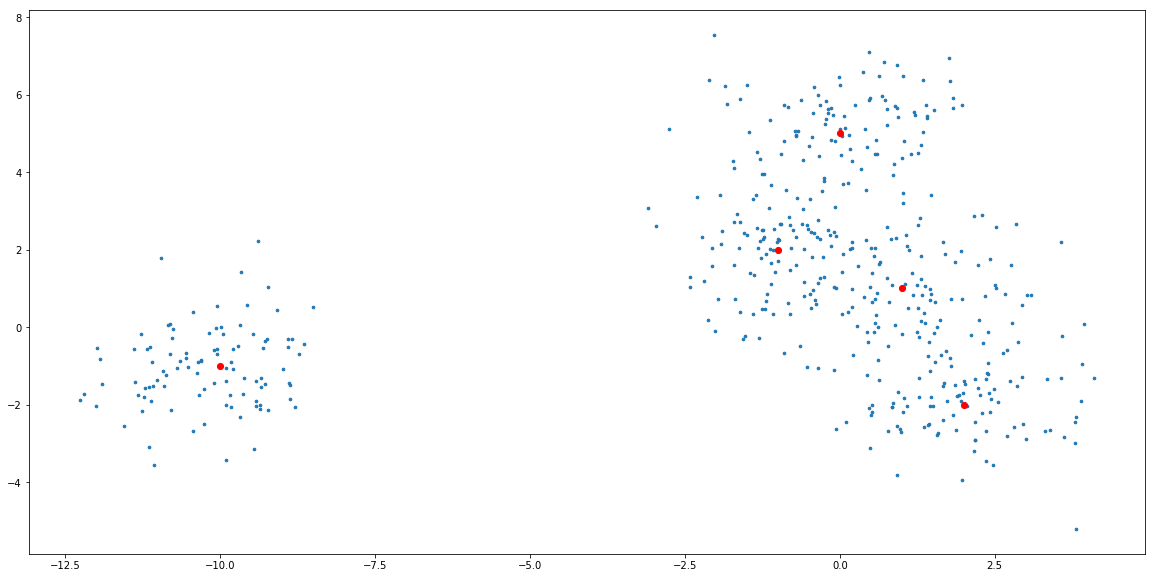

In [28]:
K = 5
X_data = generate_data(K)
X_data = X_data.transpose()
epsilon = 0.00001
centroids = np.array([ [1,2],[3,4],[5,6], [7,8], [9,10] ])
# centroids = np.random.random()*np.array([[0,0],[-12,2],[1,10], [2,-2], [-10,-1]])

centroids = centroids.transpose()
error = 10
iter = 0
X_data, centroids = initialize(X_data, centroids)
while error > epsilon:
    X_data1 = assign_cluster(X_data, centroids)
    centroids_new = update_centroids(X_data1, centroids)
    X_data = X_data1.loc[:, [0,1]]
    error = np.sqrt(np.square(centroids-centroids_new).sum(axis=1)).sum()
    centroids = centroids_new
    print('iteration',iter, ', error =', error)
    iter += 1    
print(centroids)

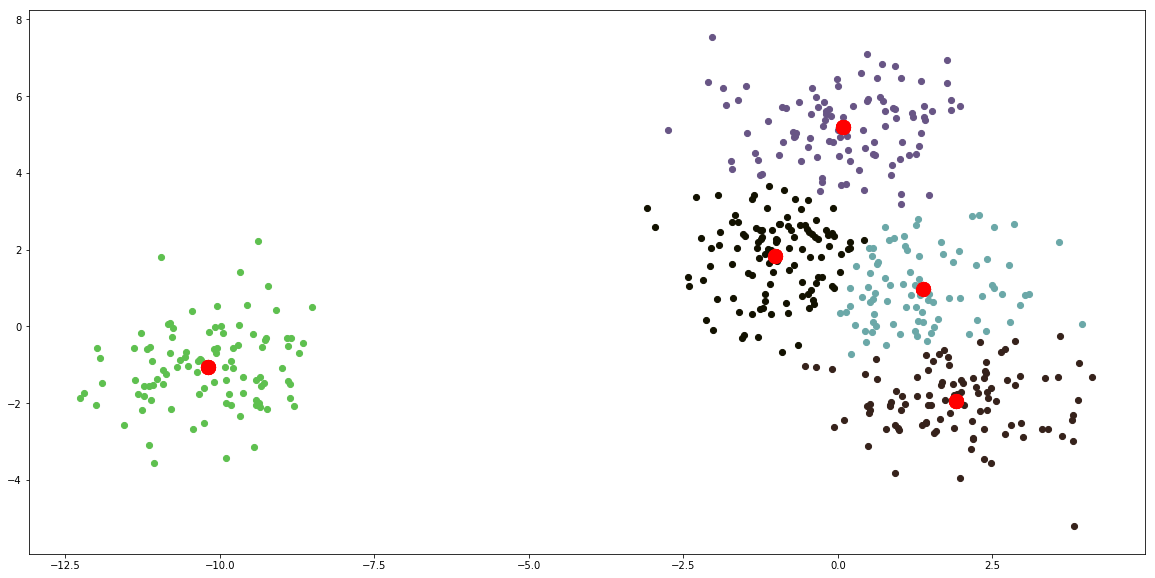

In [29]:
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(K)]

plt.figure(figsize=(20, 10))
for i in range(K):
    Aa = X_data1.loc[X_data1['cluster'] == i]
    plt.scatter(Aa.loc[:,0], Aa.loc[:,1], marker='.', c= color[i] , s=150)
    plt.scatter(centroids.loc[:,0], centroids.loc[:,1], marker='o', c= 'r' , s=200)


In [ ]:
print(np.random.random()*np.array([[0,0],[-12,2],[1,10], [2,-2], [-10,-1]]))